In [35]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential

In [36]:
import io
df = pd.read_csv('Churn_Modelling.csv')

In [37]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

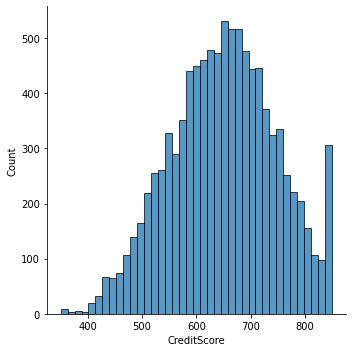

In [39]:
sns.displot(df.CreditScore.dropna(), kde=False, bins = 39);

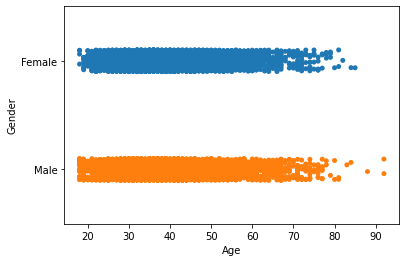

In [40]:
sns.stripplot(x="Age",y="Gender",data=df)

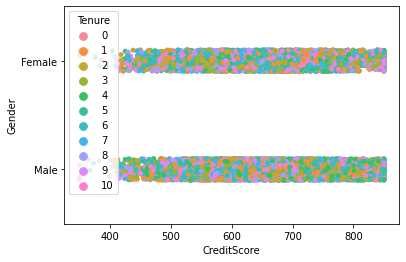

In [41]:
sns.stripplot(data=df, x="CreditScore", y="Gender", hue="Tenure")

In [42]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [43]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [44]:
df.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
IQR=df["Tenure"].quantile(0.75)-df["Tenure"].quantile(0.25)
IQR

4.0

In [46]:
f= df["Age"]
k=max(f)-min(f)
print(k)

74


In [47]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
pd.DataFrame(df.iloc[:,0:7].std().to_frame()).T


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,RowNumber,CustomerId,CreditScore,Age
0,2886.89568,71936.186123,96.653299,10.487806


In [49]:
pd.DataFrame(df.iloc[:,0:7].var().to_frame()).T


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,RowNumber,CustomerId,CreditScore,Age
0,8.334167e+06,5.174815e+09,9341.860157,109.994084


In [50]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [51]:
print(skew(df["Age"], axis=0, bias=True))
print(kurtosis(df["Age"], axis=0, bias=True))

1.0111685586628079
1.3940495456392599


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
sorted(df)

['Age',
 'Balance',
 'CreditScore',
 'CustomerId',
 'EstimatedSalary',
 'Exited',
 'Gender',
 'Geography',
 'HasCrCard',
 'IsActiveMember',
 'NumOfProducts',
 'RowNumber',
 'Surname',
 'Tenure']

In [54]:
q1=df["CreditScore"].quantile(0.25)
q3= df["CreditScore"].quantile(0.75)
IQR=df["CreditScore"].quantile(0.75)-df["CreditScore"].quantile(0.25)
IQR

134.0

In [55]:
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)
df[(df["CreditScore"] > lower_bound) | (df["CreditScore"] < upper_bound)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [56]:
from sklearn.preprocessing import LabelEncoder
df['geo'] = LabelEncoder().fit_transform(df['Geography'])
df[['Geography', 'geo']]

,Geography,geo
0,France,0
1,Spain,2
2,France,0
3,France,0
4,Spain,2
...,...,...
9995,France,0
9996,France,0
9997,France,0
9998,Germany,1


In [57]:
X= df.iloc[ : , :-1].values # X is dependent Variable
y= df.iloc[ : , 9].values # y is independent Variable
print(X)
print(y)

[[1 15634602 'Hargrave' ... 1 101348.88 1]
 [2 15647311 'Hill' ... 1 112542.58 0]
 [3 15619304 'Onio' ... 0 113931.57 1]
 ...
 [9998 15584532 'Liu' ... 1 42085.58 1]
 [9999 15682355 'Sabbatini' ... 0 92888.52 1]
 [10000 15628319 'Walker' ... 0 38190.78 0]]
[1 1 3 ... 1 2 1]


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
print(scaler.fit_transform(y.reshape(-1,1)))

[[0.        ]
 [0.        ]
 [0.66666667]
 ...
 [0.        ]
 [0.33333333]
 [0.        ]]


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
print(X_train, X_test, y_train, y_test)

      RowNumber  CustomerId           Surname  CreditScore Geography  Gender  \
799         800    15567367               Tao          601   Germany  Female   
1069       1070    15628674           Iadanza          844    France    Male   
8410       8411    15609913             Clark          743    France  Female   
9436       9437    15771000            Powell          684    France    Male   
5099       5100    15731555         Ross-Watt          595   Germany  Female   
...         ...         ...               ...          ...       ...     ...   
9225       9226    15584928  Ugochukwutubelum          594   Germany  Female   
4859       4860    15647111             White          794     Spain  Female   
3264       3265    15574372            Hoolan          738    France    Male   
9845       9846    15664035           Parsons          590     Spain  Female   
2732       2733    15592816          Udokamma          623   Germany  Female   

      Age  Tenure    Balance  NumOfProd